# FINM 250 - TA Review 2 - Linear Regression
## Tobias Rodriguez del Pozo

## 1. So, what is Linear Regression?

Linear regression is an **extremely** powerful statistical tool that allows us to model the relationship between a dependent variable and one or more independent variables. I'm sure many of you have seen the concept of a "line of best fit"; this is exactly what linear regression is doing.

The canonical form of a linear regression model is:

$$\boldsymbol{y} = \boldsymbol{\beta} \boldsymbol{X} + \epsilon$$

Note that the **bold** font indicates matrices/vectors. In particular, the defining feature of a linear regression is that it is linear in the parameters $\boldsymbol{\beta}$ and $\boldsymbol{c}$, not necessarily the independent variables $\boldsymbol{X}$. That is, $\boldsymbol{X}$ could be:

- quantitative inputs
- transforms of quantitative inputs (log, square-root, cosine, etc.)
- basis expansions (polynomials, splines, etc.)
- categorical inputs (one-hot encoding, etc.)
- interactions of the above

Thus, although the model is linear in the parameters, it can be highly non-linear in the inputs. This is part of the reason why linear regression is so powerful. An OLS (ordinary least squares) linear regression model is one that minimizes the sum of squared residuals:

$$
\hat{\beta} = \arg \min_\beta \sum_{i=1}^{N}\left(y_i - \beta_0 - \sum_{j=1}^{p}x_{i,j}\beta_j\right)^2
$$

You will also see closed-form solutions for OLS:

$$
\hat{\boldsymbol{\beta}} = \left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}
$$

We need some assumptions to hold for OLS to work:

- **Linearity**: the relationship between the dependent variable and the independent variables is linear in the parameters.
- **Independence**: the residuals are independent of each other.
- **Normality**: the residuals are normally distributed ($\epsilon \sim N(0, \sigma)$).
- **Homoscedasticity**: the variance of the residuals is constant (also called the "no heteroscadasticity" assumption).
- **No multicollinearity/autocorrelation**: the independent variables are not too highly correlated with each other in space or time.

There are many resources to learn more about linear regression. I recommend the following:

- Khan Academy: [any of his videos are good](https://www.youtube.com/watch?v=yMgFHbjbAW8)
- Elements of Statistical Learning: [Chapter 3](https://web.stanford.edu/~hastie/ElemStatLearn/printings/ESLII_print12.pdf)
- Pattern Recognition and Machine Learning: [Chapter 3](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf)
- [Wikipedia](https://en.wikipedia.org/wiki/Linear_regression)
- [Statsmodels](https://www.statsmodels.org/stable/regression.html)
- [Scikit-learn](https://scikit-learn.org/stable/modules/linear_model.html)
- [Video](https://www.youtube.com/watch?v=EMIyRmrPWJQ)
- [Video](https://www.youtube.com/watch?v=ZkjP5RJLQF4)
- Most articles or videos that you can find online are good.

Note that this covers a wide span of difficulties; this review alone mostly suffices for this class. The other resources are for those who want to learn more.

### 1.1. Linearity

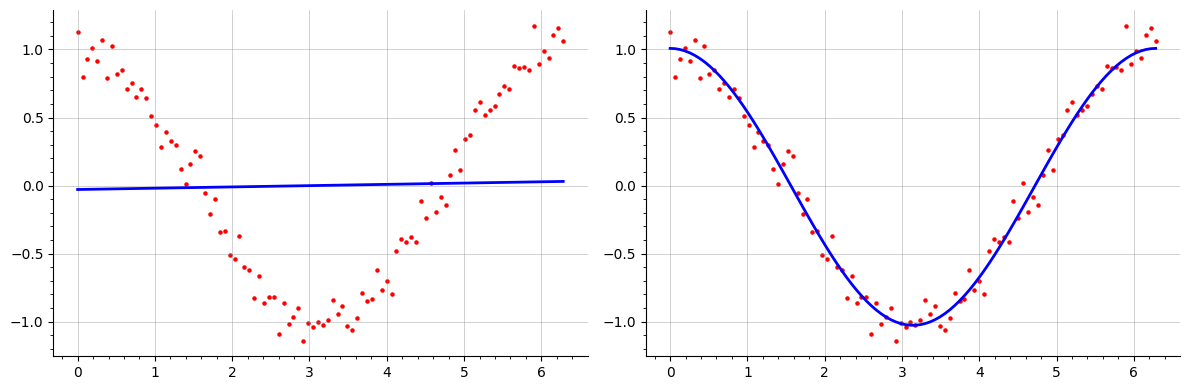

In [34]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

p = plt.rcParams

p["axes.spines.right"] = False
p["axes.spines.top"] = False
p["font.weight"] = "light"
p["ytick.minor.visible"] = True
p["xtick.minor.visible"] = True
p["axes.grid"] = True
p["grid.color"] = "0.5"
p["grid.linewidth"] = 0.5
p["grid.alpha"] = 0.5
p["axes.spines.top"] = False
p["axes.spines.right"] = False

x = np.linspace(0, 2 * np.pi, 100)
y = np.cos(x) + np.random.normal(0, 0.1, 100)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].scatter(x, y, color="red", s=5)

# Run linear regression using sklearn.
regr = LinearRegression().fit(x.reshape(-1, 1), y)

# Plot the regression line.
axes[0].plot(x, regr.predict(x.reshape(-1, 1)), color="blue", linewidth=2)

# Turn x into cos(x)
x_cos = np.cos(x)

# Run linear regression using sklearn.
regr_inv = LinearRegression().fit(x_cos.reshape(-1, 1), y)

# Plot x and y
axes[1].scatter(x, y, color="red", s=5)

# Plot the regression line.
axes[1].plot(x, regr_inv.predict(x_cos.reshape(-1, 1)), color="blue", linewidth=2)
fig.tight_layout()

### 1.2, 1.3 Independence and Normality

We skip these, as they are beyond the scope of this class.

### 1.3 Homoscedasticity

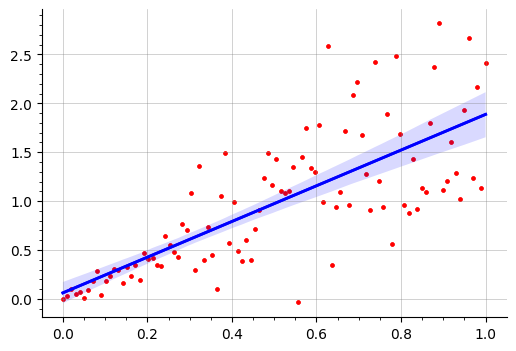

In [35]:
# Make y increase in variance as we move to the right.
x = np.linspace(0, 1, 100)
y = np.concatenate(
    [
        np.random.normal(0, 0.1, 25),
        np.random.normal(0, 0.3, 25),
        np.random.normal(0, 0.5, 25),
        np.random.normal(0, 0.7, 25),
    ]
) + 2 * np.linspace(0, 1, 100)

# Plot x and y
fig, ax = plt.subplots(figsize=(6, 4))

ax.scatter(x, y, color="red", s=5)

# Run linear regression using sklearn.
regr = LinearRegression().fit(x.reshape(-1, 1), y)

# Plot the regression line.
ax.plot(x, regr.predict(x.reshape(-1, 1)), color="blue", linewidth=2)

# Or,
sns.regplot(
    x=x,
    y=y,
    color="red",
    scatter_kws={"s": 5},
    line_kws={"color": "blue", "linewidth": 2},
);

This is a **serious** problem in finance; returns definitely do not have constant variance. The reason for this comes back to one of the properties of regression: that is the Best Linear Unbiased Estimator (BLUE). What happens if we have different variance? Then it is still unbiased, but it is not the best estimator, eg. consider running a piecewise regression by partitioning the data into variance buckets (if you have bucketed variance) and running a regression on each bucket. This is a better estimator (neccessarily), but it is not linear. Thus, we need to find a way to deal with this.

### 1.4 No multicollinearity/autocorrelation

Hint: This is a similar problem to Part 3 of Homework 1. What happens to $(X^T X)^{-1}$ when there is linear dependence?

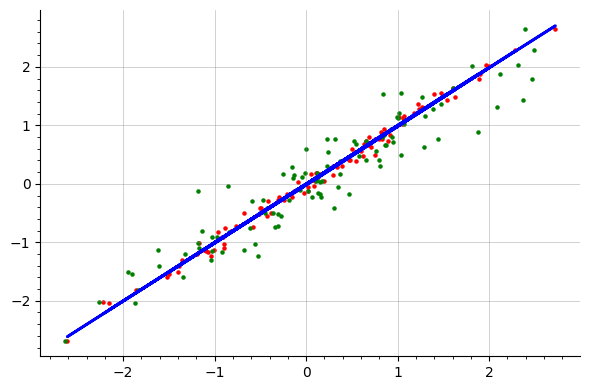

In [36]:
# Make x be 2 dimensional and have a correlation of 0.95 between the two columns.
x = np.random.multivariate_normal([0, 0], [[1, 0.95], [0.95, 1]], 100)

y = x[:, 0] + np.random.normal(0, 0.1, 100)

fig, ax = plt.subplots(figsize=(6, 4))

ax.scatter(x[:, 0], y, color="red", s=5)
ax.scatter(x[:, 1], y, color="g", s=5)

# Run linear regression using sklearn.
regr = LinearRegression().fit(x, y)

# Plot the regression line.
ax.plot(x[:, 0], regr.predict(x), color="blue", linewidth=2)
fig.tight_layout()

## 2. How do we use Linear Regression in Python?

In [37]:
# There are two main modules for doing linear regression in Python: statsmodels and sklearn.
# You are not required to use a specific module for your homework, and I will be using both in this notebook,
# though, I personally prefer statsmodels. Statsmodels is more statistical in nature, while sklearn is
# more machine learning in nature.
import pandas as pd
import statsmodels.api as sm

# Generate some data.
data_ml = pd.read_excel(
    "../data/proshares_analysis_data.xlsx",
    sheet_name="merrill_factors",
    index_col=0,
    parse_dates=[0],
)
data_hf = pd.read_excel(
    "../data/proshares_analysis_data.xlsx",
    sheet_name="hedge_fund_series",
    index_col=0,
    parse_dates=[0],
)

X = data_hf
y = data_ml["SPY US Equity"]

# Run linear regression using statsmodels.
# Add a constant to the X variables.
X_const = sm.add_constant(X)

# Run the regression.
stats_model = sm.OLS(y, X_const).fit()

# Run linear regression using sklearn.
# Note: sklearn does add a constant by default, so lets remove it for this example.
sklearn_model = LinearRegression(fit_intercept=True).fit(X, y)

# Show the coefficients from both models.
coeffs = pd.DataFrame(
    {
        "statsmodels": stats_model.params,
        "sklearn": [sklearn_model.intercept_, *sklearn_model.coef_],
    },
    index=["const", *X.columns],
)
display(coeffs)

# Show the R^2 from both models.
print(f"statsmodels R^2: {stats_model.rsquared:.4f}")
print(f"sklearn R^2: {sklearn_model.score(X, y):>10.4f}")

,statsmodels,sklearn
const,0.003586,0.003586
HFRIFWI Index,0.307588,0.307588
MLEIFCTR Index,13.243121,13.243121
MLEIFCTX Index,-11.742666,-11.742666
HDG US Equity,-0.159447,-0.159447
QAI US Equity,0.810388,0.810388


statsmodels R^2: 0.8289
sklearn R^2:     0.8289


In [38]:
stats_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SPY US Equity   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     131.7
Date:                Sat, 24 Jun 2023   Prob (F-statistic):           2.42e-50
Time:                        19:39:01   Log-Likelihood:                 373.75
No. Observations:                 142   AIC:                            -735.5
Df Residuals:                     136   BIC:                            -717.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0036      0.002      1.939      0.055   -7.19e-05       0.007
HFRIFWI Index      0.3076      0.200      1.540      0.126      -0.087       0.703
MLEIFCTR Index    13.2431      7.581      1.747      0.083      -1.748      28.235
MLEIFCTX Index   -11.7427      7.509     -1.564      0.120     -26.592       3.107
HDG US Equity     -0.1594      0.550     -0.290      0.772      -1.248       0.929
QAI US Equity      0.8104      0.235      3.445      0.001       0.345       1.276
==============================================================================
Omnibus:                        1.714   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.424   Jarque-Bera (JB):                1.316
Skew:                           0.217   Prob(JB):                        0.518
Kurtosis:                       3.182   Cond. No.                     7.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 3. What did I mean by "bad fit" and "unstable"?

In [39]:
# Well, the easiest way to check is to look at the R^2 value. The R^2 value is the percentage of the variance in the
# dependent variable that is explained by the independent variables. So, the higher the R^2 value, the better the
# model is at explaining the dependent variable.

# In statsmodels, the R^2 value is called rsquared, and in sklearn, it is called score. Both are shown below.
print(f"statsmodels R^2: {stats_model.rsquared:.4f}")
print(f"sklearn R^2: {sklearn_model.score(X, y):>10.4f}")

# The R^2 value is around 83%, meaning that the model explains 83% of the variance in the dependent variable. Thus,
# in the case of finance, we are saying that we can replicate 83% of the returns of the S&P 500 using the returns of
# the hedge fund series. So, a small R^2 would mean it is a bad fit.

# We can also check the p-values of the coefficients. The p-value is the probability that the coefficient is 0. There
# are many other tests, and importantly we can make our own using the residuals!


def my_custom_error(true_y, pred_y):
    return np.mean(np.abs(true_y - pred_y))


print(f"statsmodels custom error: {np.mean(np.abs(stats_model.resid)):.4f}")
print(f"sklearn custom error: {my_custom_error(y, sklearn_model.predict(X)):>10.4f}")

statsmodels R^2: 0.8289
sklearn R^2:     0.8289
statsmodels custom error: 0.0134
sklearn custom error:     0.0134


In [40]:
# For instability, we generally want to look at the size of the betas (in finance). If the betas are large, then
# small changes in the independent variables will lead to large changes in the dependent variable. Given how badly
# we are able to measure returns, having very large betas is a bad thing.

# For example, we have betas of 13 and -11 for some of the hedge fund series. This indicates a huge long/short position
# to replicate these returns. What happens if we change the returns by just a little bit in these series?

display(stats_model.params)

# Lets add some noise to the data.
X_perturbed = X.copy()
X_perturbed += np.random.normal(0, 0.0001, X.shape)

# Run linear regression using statsmodels.
display(sm.OLS(y, sm.add_constant(X_perturbed)).fit().params)

const              0.003586
HFRIFWI Index      0.307588
MLEIFCTR Index    13.243121
MLEIFCTX Index   -11.742666
HDG US Equity     -0.159447
QAI US Equity      0.810388
dtype: float64

const             0.004382
HFRIFWI Index     0.330555
MLEIFCTR Index    6.396166
MLEIFCTX Index   -4.979276
HDG US Equity    -0.088325
QAI US Equity     0.822854
dtype: float64

## 4. How does this apply to Finance?

,alpha,beta,tracking_error,information ratio,r_squared,treynor ratio,downside_beta
HDG US Equity,-0.027027,0.359536,0.00809,-0.964387,0.778808,0.359485,0.40702


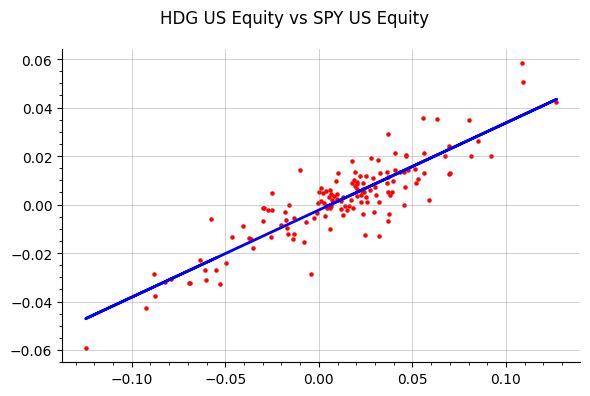

In [41]:
# Suppose we that we want to make a new ETF, but that we for some reason can't buy SPY or the
# underlying stocks. Can we use other ETFs to replicate SPY?

# Or, suppose that we are a hedge fund, and we want to see how much of an edge we actually
# provide to our clients. We have a series of returns, and we want to see how much those
# returns can be explained by the market. In fact, running a regression of our returns on
# the market is so common that it has a name: beta!

# We may also want to see how our returns are correlated with the market, when the market
# is going down. This is called downside beta and is widely used in the industry.

# Or, maybe we are worried about non-linear exposure to the market, and want to see if our
# returns are correlated with the square of the market, or the upside of the market.

# ALL of these questions can be (somewhat) answered by linear regression.

hdg_us = data_hf["HDG US Equity"]
spy = data_ml["SPY US Equity"]

hdg_regr = sm.OLS(hdg_us, sm.add_constant(spy)).fit()
downside_mask = spy < 0

summary = dict()
summary["alpha"] = hdg_regr.params["const"] * 12
summary["beta"] = hdg_regr.params["SPY US Equity"]
summary["tracking_error"] = hdg_regr.resid.std()
summary["information ratio"] = (
    hdg_regr.params.iloc[0] / hdg_regr.resid.std()
) * np.sqrt(12)
summary["r_squared"] = hdg_regr.rsquared
summary["treynor ratio"] = (spy.mean() / summary["beta"]) * 12

spy_downside = spy[downside_mask].dropna()
hdg_us_downside = hdg_us[downside_mask].dropna()

summary["downside_beta"] = (
    sm.OLS(hdg_us_downside, sm.add_constant(spy_downside)).fit().params["SPY US Equity"]
)

display(pd.DataFrame(summary, index=["HDG US Equity"]))

# Plot the results.
fig, ax = plt.subplots(figsize=(6, 4))

ax.scatter(spy, hdg_us, color="red", s=5)
ax.plot(spy, hdg_regr.predict(sm.add_constant(spy)), color="blue", linewidth=2)
fig.suptitle("HDG US Equity vs SPY US Equity")
fig.tight_layout()

## Extras:

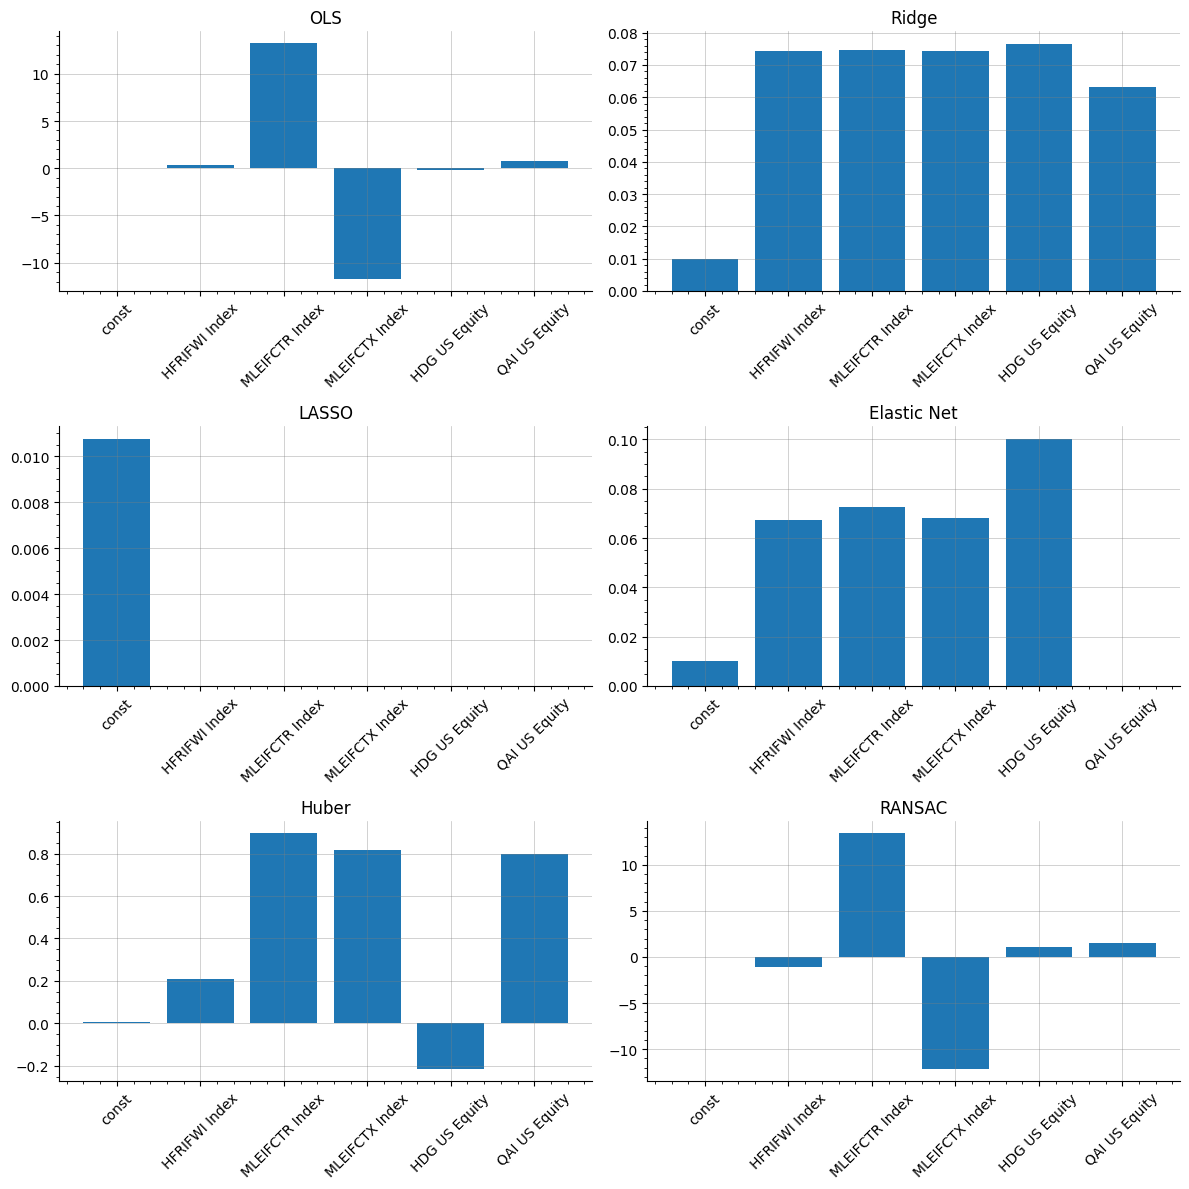

In [42]:
# Linear models is a whole field of study, and there are many different types of linear models.
# The classic examples are penalized linear models, such as ridge regression and LASSO regression,
# but we can expand this to things like fused LASSO, elastic net, Huber, Tukey, RANSAC, etc. to
# give you a taste of how they might impact the betas:

# Ridge regression
from sklearn.linear_model import (
    Ridge,
    Lasso,
    ElasticNet,
    HuberRegressor,
    RANSACRegressor,
)

ridge_model = Ridge(alpha=1).fit(X, y)
ridge_coef = [ridge_model.intercept_, *ridge_model.coef_]

# LASSO regression
lasso_model = Lasso(alpha=0.001).fit(X, y)
lasso_coef = [lasso_model.intercept_, *lasso_model.coef_]

# Elastic net regression
elastic_model = ElasticNet(alpha=0.001, l1_ratio=0.5).fit(X, y)
elastic_coef = [elastic_model.intercept_, *elastic_model.coef_]

# Huber regression
huber_model = HuberRegressor(max_iter=1000).fit(X, y)
huber_coef = [huber_model.intercept_, *huber_model.coef_]

# RANSAC regression
ransac_model = RANSACRegressor().fit(X, y)
ransac_coef = [ransac_model.estimator_.intercept_, *ransac_model.estimator_.coef_]

# Plot 3x2 grid of betas.
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

coeffs = {
    "OLS": stats_model.params,
    "Ridge": ridge_coef,
    "LASSO": lasso_coef,
    "Elastic Net": elastic_coef,
    "Huber": huber_coef,
    "RANSAC": ransac_coef,
}

axes = axes.flatten()

for i, (name, coef) in enumerate(coeffs.items()):
    axes[i].bar(x=range(len(coef)), height=coef)
    axes[i].set_xticks(range(len(coef)))
    axes[i].set_xticklabels(["const", *X.columns], rotation=45)
    axes[i].set_title(name)

fig.tight_layout()

## Python Continued

### Python Tidbit #1: How to Make Your For Loops Smarter

In [43]:
# Example 1: Calculating something from two lists of the same length.

tax_rate = [i / 10 for i in range(1, 11)]
income_rate = [i * 1000 for i in range(50, 61)]
tax_paid = []

# You might be tempted to do something like this:
for idx in range(len(tax_rate)):
    tax = tax_rate[idx] * income_rate[idx]
    tax_paid.append(tax)

# Or maybe you know what enumerate() does, and you do this:
for idx, rate in enumerate(tax_rate):
    tax = rate * income_rate[idx]
    tax_paid.append(tax)

# But, you can do this instead:
for rate, income in zip(tax_rate, income_rate):
    tax = rate * income
    tax_paid.append(tax)

# And finally, you can combine this into a list comprehension:
tax_paid = [rate * income for rate, income in zip(tax_rate, income_rate)]

In [44]:
# Example 2: Filtering directly. Suppose we want to filter out all negative numbers from a list.
my_list = [1, 2, 3, -1, -2, -3, 4, 5, 6, -4, -5, -6]

# List comprehension
my_list_filt = [i for i in my_list if i >= 0]

# But suppose you want to append the numbers to a new list, but you can't
# do that in a list comprehension.

my_list_filt = []

for i in my_list:
    if i >= 0:
        my_list_filt.append(i)

# This is somewhat better, but we can do even better with a filter() function.
# Note that this enables you to have some complex logic in the filter, without
# needing to write a bunch of if-else statements; eg.

for i in filter(lambda x: x >= 0, my_list):
    my_list_filt.append(i)


def my_filter(x):
    if x >= 0 and x % 2 == 0 and x < 5 and x != 3:
        return True
    return False


for i in filter(my_filter, my_list):
    my_list_filt.append(i)

# This is rarely used, but suppose you wanted to invert
# the logic of the complicated my_filter() function. You can use
# itertools.filterfalse() to do this.
from itertools import filterfalse

for i in filterfalse(my_filter, my_list):
    my_list_filt.append(i)

In [45]:
# Example 3: Using previous/next values without having to use indices.
my_list = [i for i in range(10)]

# Suppose we want to calculate the difference between each value and the next value.
# We could do this:
diffs = []
for idx in range(len(my_list) - 1):
    diff = my_list[idx + 1] - my_list[idx]
    diffs.append(diff)

# Or maybe something that uses enumerate():
for idx, val in enumerate(my_list[:-1]):
    diff = my_list[idx + 1] - val
    diffs.append(diff)

# Or we could use zip():
for val, next_val in zip(my_list[:-1], my_list[1:]):
    diff = next_val - val
    diffs.append(diff)

# But we could just save ourselves the trouble and use the itertools module!
# This is VERY useful when dealing with, for example, time series data. If
# you look at my solution for 3.6 for Homework 1, you'll see that I used it to
# calculate the training and testing sets.
from itertools import pairwise

for val, next_val in pairwise(my_list):
    diff = next_val - val
    diffs.append(diff)

# Of course, if this was a job interview and you wanted to show off, do:
diffs = list(map(lambda x: x[0] - x[1], pairwise(my_list)))

In [46]:
from regression import calc_perf_metrics, calc_iter_regr

RETURN_COLS = ["Annualized Return", "Annualized Volatility", "Annualized Sharpe Ratio"]
RISK_COLS = [
    "Skewness",
    "Excess Kurtosis",
    "VaR (0.05)",
    "CVaR (0.05)",
    "Max Drawdown",
    "Bottom",
    "Peak",
    "Recovery",
]

rets = pd.read_excel(
    "../data/multi_asset_etf_data.xlsx",
    sheet_name="excess returns",
    index_col=0,
    parse_dates=[0],
)

calc_perf_metrics(rets)

,Annualized Return,Annualized Volatility,Annualized Sharpe Ratio,Annualized Sortino Ratio,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05),Min,Max,Max Drawdown,Bottom,Peak,Recovery,Duration (days),Calmar Ratio
BWX,-0.000188,0.083618,-0.002247,-0.003107,-0.306091,0.911628,-0.043474,-0.056366,-0.069406,0.077951,-0.321424,2022-09-30,2020-12-31,-,-,-0.000585
DBC,0.019866,0.178831,0.111085,0.161833,-0.322608,0.717249,-0.086190,-0.114956,-0.177562,0.163135,-0.669081,2020-04-30,2011-04-30,-,-,0.029691
EEM,0.064084,0.196755,0.325704,0.537678,0.146180,0.897026,-0.082815,-0.112785,-0.179084,0.162805,-0.366400,2022-10-31,2021-06-30,-,-,0.174902
EFA,0.082113,0.166509,0.493148,0.796698,-0.062439,0.733888,-0.077363,-0.100835,-0.145227,0.142902,-0.276203,2022-09-30,2021-08-31,-,-,0.297294
HYG,0.064215,0.089848,0.714708,1.035829,0.458937,5.647642,-0.029060,-0.051163,-0.104440,0.137906,-0.152857,2022-09-30,2021-12-31,-,-,0.420097
IEF,0.017179,0.062642,0.274246,0.421536,-0.122193,0.185672,-0.029631,-0.039612,-0.047632,0.046106,-0.212735,2022-10-31,2020-07-31,-,-,0.080754
IYR,0.128820,0.188221,0.684407,1.109288,0.490846,4.700898,-0.065108,-0.097177,-0.200485,0.295597,-0.291433,2023-05-31,2021-12-31,-,-,0.442023
PSP,0.124741,0.226081,0.551752,0.742698,-0.446344,2.367271,-0.103115,-0.142933,-0.278880,0.229648,-0.452017,2022-09-30,2021-10-31,-,-,0.275965
QAI,0.017470,0.050875,0.343380,0.467507,-0.550344,1.793513,-0.019693,-0.034179,-0.060508,0.036397,-0.137591,2022-09-30,2021-06-30,-,-,0.126967
SPY,0.141739,0.148110,0.956980,1.388516,-0.385008,0.606748,-0.068046,-0.086928,-0.129032,0.126767,-0.239572,2022-09-30,2021-12-31,-,-,0.591631


### Python Tidbit #2: How to Avoid Typing the Same Variables Over and Over Again

In [47]:
# Here is another example of dictionary unpacking and where it can be useful.
# Recall from the calc_iter_regr(y, X, intercept=True, one_to_many=False, adj=12) function,
# that we have 3 different parameters that we can set. Suppose that for *this* notebook in
# particular, we want to change all of them. However, we don't want to have to repeatedly call
# the function with different parameters, eg:

calc_iter_regr(
    rets[["IEF", "HYG", "PSP"]], rets["SPY"], intercept=False, one_to_many=True, adj=52
)

# We can simply make a dictionary of the parameters we want to change, and then unpack it into
# the function.

PARAMS = {"intercept": False, "one_to_many": True, "adj": 52}

calc_iter_regr(rets[["IEF", "HYG", "PSP"]], rets["SPY"], **PARAMS)

# We can also use something like functools.partial to *partially* apply the function with the
# parameters we want to change. This is useful if we want to change multiple parameters, perhaps
# in a more complex way, or by personal preference. This pre-applies the parameters we want to change,
# and returns a new function that we can call with the remaining parameters.

from functools import partial

calc_iter_regr_partial = partial(
    calc_iter_regr, intercept=False, one_to_many=True, adj=12
)

calc_iter_regr_partial(rets[["IEF", "HYG", "PSP"]], rets["SPY"])

# Finally, note how we're constantly repeating rets[["IEF", "HYG", "PSP"]] and rets["SPY"] in the
# function calls! We could fix this with another partial function, but we can also use list unpacking.
VAR_LIST = [rets[["IEF", "HYG", "PSP"]], rets["SPY"]]

# This is what Python means when you see a function that looks like: func(*args, **kwargs)
# Note how we can end the line with a ';' to suppress the output of the function call.
calc_iter_regr(*VAR_LIST, **PARAMS);

### Python Tidbit #3: Local vs. Global Scope

In [48]:
# In Jupyter Notebooks, it is often tempting to have functions like this:

my_data = [i for i in range(10)]


def square_data():
    return [i**2 for i in my_data]


# This it not a good idea, since it makes the function dependent on the global variable my_data.
# Suppose that you want to use this function in another notebook (like for the midterm), but you
# just copy-paste the function.

# Jupyter Notebook gives you the *illusion* that your function works and is modular, when in reality,
# it is no different from having the code directly in your Notebook, and actually tricks you into
# thinking that it is modular!
square_data()

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [49]:
# Uh, oh!
del my_data

# Well, this does give us the opportunity to talk about exception handling.
try:
    square_data()
except NameError as e:
    print(e)

name 'my_data' is not defined


### Python Tidbit #4: List Slicing

In [55]:
# Use of list slicing also applies to strings, and DataFrames!
# Think about why this might be the case. What is the general concept
# that allows us to both loop through something and also slice it?
# The __getitem__() method!

my_list = [i for i in range(10)]

# Get the first 5 elements
my_list[:5]

# Get last 5 elements
my_list[-5:]

# Get the middle 5 elements
my_list[2:7]

# Get every second element
my_list[::2]

# Get every second element starting from 3
my_list[3::2]

# Reverse the list
my_list[::-1]

# Get the first 5 elements, but in reverse
my_list[4::-1]

# Note how this works for DataFrames as well!
my_df = pd.DataFrame(np.random.randn(10, 5), columns=[f"Col {i}" for i in range(5)])

# Same as with the df
my_df.iloc[:5]
my_df.iloc[-5:]
my_df.iloc[2:7]
my_df.iloc[::2]
my_df.iloc[3::2]
my_df.iloc[::-1]
my_df.iloc[4::-1]

# etc.

my_list.__getitem__(slice(0, 5, 1))
my_df.__getitem__(slice(0, 5, 1));

### Python (well, VSCode/PyCharm) Tidbit #5: How to Use the Debugger

In [61]:
# Suppose I have some code that is giving me an error, and I want to debug it.


def convoluted_list_operations(lst1, lst2):
    lst1 = lst1[::-1]
    lst1 += lst2
    lst1.sort(reverse=True)
    lst1 = list(set(lst1))
    if not lst1:
        return []
    total_sum = sum(lst1)
    max_value = max(lst1)
    average = total_sum / len(lst1)
    repeated_list = average * int(total_sum)
    repeated_list = list([repeated_list]).extend(lst1)
    del repeated_list[0]
    del repeated_list[-1]
    repeated_list.reverse()
    repeated_list = repeated_list
    split_index = len(repeated_list) // 2
    sublist1 = repeated_list[:split_index]
    sublist2 = repeated_list[split_index:]
    zipped_dict = dict(zip(sublist1, sublist2))
    sorted_dict = dict(sorted(zipped_dict.items(), key=lambda x: x[0], reverse=True))
    final_list = list(sorted_dict.values()) * float(max_value)
    return final_list


# convoluted_list_operations([1.1, 2, 3], [4, 5, 6])

### Pandas Tidbit #1: Aggregating Functions

In [65]:
# Were it not for the fact that we're using a dictionary to store the summary
# parameters, we could save ourselves quite a bit of coding by using the .agg
# method. This was covered briefly in the first TA review session, but suppose
# we have the following problem: we want to calculate the mean, standard deviation,
# and perhaps some more complex metrics for each column in the DataFrame.


def average_tuesday_returns(df):
    return df[df.index.day_name() == "Tuesday"].mean()


def var_05(df):
    return df.quantile(0.05)


def minimum_friday_returns(df):
    return df[df.index.day_name() == "Friday"].min()


def sharpe(df):
    return df.mean() / df.std()


# We could do this:
my_metrics = {}

my_metrics["mean"] = rets.mean()
my_metrics["std"] = rets.std()
my_metrics["sharpe"] = rets.mean() / rets.std()
my_metrics["average_tuesday_returns"] = average_tuesday_returns(rets)
my_metrics["var_05"] = var_05(rets)
my_metrics["minimum_friday_returns"] = minimum_friday_returns(rets)

my_metrics = pd.DataFrame(my_metrics, index=rets.columns)

# But this uses up a lot of code, and is not very friendly to read. We're
# essentially just mindlessly repeating the same code over and over again.

# We could do this instead:
my_metrics = rets.agg(
    ["mean", "std", sharpe, average_tuesday_returns, var_05, minimum_friday_returns]
)
my_metrics = my_metrics.T
my_metrics

# Or, we can combine this with a variable, say we want one set of functions to
# calculate the risk metrics, and another to calculate the return metrics.

RETURN_METRICS = ["mean", "std", sharpe, average_tuesday_returns]
RISK_METRICS = [var_05, minimum_friday_returns]

my_metrics = rets.agg(RETURN_METRICS + RISK_METRICS)

# Or (and this is worse than simply using + to join the lists), we can use
# our new friend, iterator unpacking.
my_metrics = rets.agg([*RETURN_METRICS, *RISK_METRICS])

# We can also use the .agg method to apply different functions to different columns.
# Suppose we want the mean for BWX, the average Tuesday returns for SPY, and the
# standard deviation for IEF.
my_metrics = rets.agg({"BWX": "mean", "SPY": average_tuesday_returns, "IEF": "std"})

# Of course, remember to keep track of which operations you're doing to
# which asset.

### Pandas (well, numpy) Tidbit #2: np.select()

In [53]:
# Suppose we want to calculate a bunch of different flags across all of the assets.
# as an example:
# 0 - if the mean on that day is negative
# 1 - if the mean on that day is positive
# 2 - if the day is a Tuesday and the mean is negative
# 3 - if the day is a Tuesday and the mean is positive

# We could do this:
rets_new = rets.copy()

rets_new["flag_0"] = 0
rets_new.loc[rets_new.mean(axis=1) > 0, "flag_0"] = 1
rets_new.loc[rets_new.index.day_name() == "Tuesday", "flag_0"] = 2
rets_new.loc[
    (rets_new.index.day_name() == "Tuesday") & (rets_new.mean(axis=1) > 0), "flag_0"
] = 3

# But this is a lot of code, and it's not very readable. We could do something like this
# using np.where, but it isn't much better. Though, for simple if-else statements, np.where
# IS the best option.

rets_new = rets.copy()
rets_new["flag_0"] = np.where(rets_new.mean(axis=1) > 0, 1, 0)
rets_new["flag_0"] = np.where(
    rets_new.index.day_name() == "Tuesday", 2, rets_new["flag_0"]
)
rets_new["flag_0"] = np.where(
    (rets_new.index.day_name() == "Tuesday") & (rets_new.mean(axis=1) > 0),
    3,
    rets_new["flag_0"],
)

# Think of np.where as:
# np.where(condition, if_true, if_false), ie:
# if rets_new.mean(axis=1) > 0:
#     return 1
# else:
#     return 0

# This is where np.select comes in. It's a bit more complicated, but much more elegant.
rets_new = rets.copy()

rets_new["flag_0"] = np.select(
    condlist=[
        rets_new.mean(axis=1) > 0,
        rets_new.index.day_name() == "Tuesday",
        (rets_new.index.day_name() == "Tuesday") & (rets_new.mean(axis=1) > 0),
        True,
    ],
    choicelist=[1, 2, 3, 0],
)

# Think of np.select as:
# if FIRST_CONDITION:
#     return 1
# else:
#     if SECOND_CONDITION:
#         return 2
#     else:
#         if THIRD_CONDITION:
#             return 3
#         else:
#             return 0